# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
display(gold_recovery_train.head(100))
gold_recovery_train.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016-01-18 23:00:00,4.279062,10.787830,4.935578,46.737164,67.624102,11.221140,1.929114,17.168856,2.563999,...,13.956522,-548.706433,11.906679,-549.381320,10.018879,-500.064959,8.042675,-500.596275,12.034329,-599.070710
96,2016-01-19 00:00:00,4.217245,10.394992,5.271065,46.686493,67.609375,11.188185,1.870826,17.182693,2.465728,...,14.042233,-567.822701,11.975907,-555.137413,9.969669,-500.027763,8.000319,-499.643106,11.976933,-599.573305
97,2016-01-19 01:00:00,4.423173,10.490954,4.417617,46.534069,70.591923,11.363554,1.931561,16.430104,2.459424,...,14.090890,-551.113958,11.998496,-550.030042,10.002234,-500.386551,7.965989,-500.418199,11.998726,-601.294837
98,2016-01-19 02:00:00,2.660271,6.020833,2.339234,27.097386,58.017871,5.640190,0.865842,7.574660,1.505868,...,13.947368,-703.993293,12.018188,-559.800324,9.999754,-512.673353,7.946763,-500.475471,11.963962,-607.847547


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [3]:
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
display(gold_recovery_test.head())
gold_recovery_test.info()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [4]:
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')
display(gold_recovery_full.head())
gold_recovery_full.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [5]:
def recovery_fun(data): 
    c = data['rougher.output.concentrate_au']
    f = data['rougher.input.feed_au']
    t = data['rougher.output.tail_au']
    recovery = c * (f - t) / (f + 0.000001) / (c - t + 0.000001) * 100
    return recovery

gold_recovery_train['rougher.calculation.recovery'] = gold_recovery_train.apply(recovery_fun, axis = 1)

gold_recovery_train['rougher.output.recovery'] = gold_recovery_train['rougher.output.recovery'].fillna(0)
gold_recovery_train['rougher.calculation.recovery'] = gold_recovery_train['rougher.output.recovery'].fillna(0)

print('МАE -',mean_absolute_error(gold_recovery_train['rougher.output.recovery'], gold_recovery_train['rougher.calculation.recovery']))

МАE - 0.0


По результатам расчета метрики MAE можно сделать вывод, что rougher.output.recovery посчитано верно.

Проанализировав поля отсутствующие в тестовой выборке можно сделать вывод, что из неё были удалены поля содержащие параметры финально продукта, целевые признаки, поля с типом output(параметры продукта)  и расчетные характеристики(calculation). То есть по тестовой выбоке мы можем сказать что приходит(input) на определенный этап(флотация отчистка), что на нем происходит(state).

In [6]:
gold_recovery_full.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace = True)
gold_recovery_train = gold_recovery_train.ffill(axis = 0)
gold_recovery_test = gold_recovery_test.ffill(axis = 0)
gold_recovery_full = gold_recovery_full.ffill(axis = 0)

В ходе этапа подготовки данных были изучены все предоставленные выборки, были изучены все признаки и этапы добычи и обработки руды. Была осуществлена проверка расчетов некоторых признаков. Кроме этого пропуски в полях заменили на подходящие значения методом ffill().

# 2. Анализ данных

## Изучение концентрации металлов на различных стадийх отчистки 

In [7]:
concentrate_au = gold_recovery_full[['rougher.input.feed_au','rougher.output.concentrate_au',
                          'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
concentrate_ag = gold_recovery_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
                                     'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
concentrate_pb = gold_recovery_full[['rougher.input.feed_pb','rougher.output.concentrate_pb', 
                                     'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
display(concentrate_au.head())

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141


Были созданы 3 таблица для каждого металла с их концентрацией на каждом этапе. Пример таблицы по золоту представлен выше.

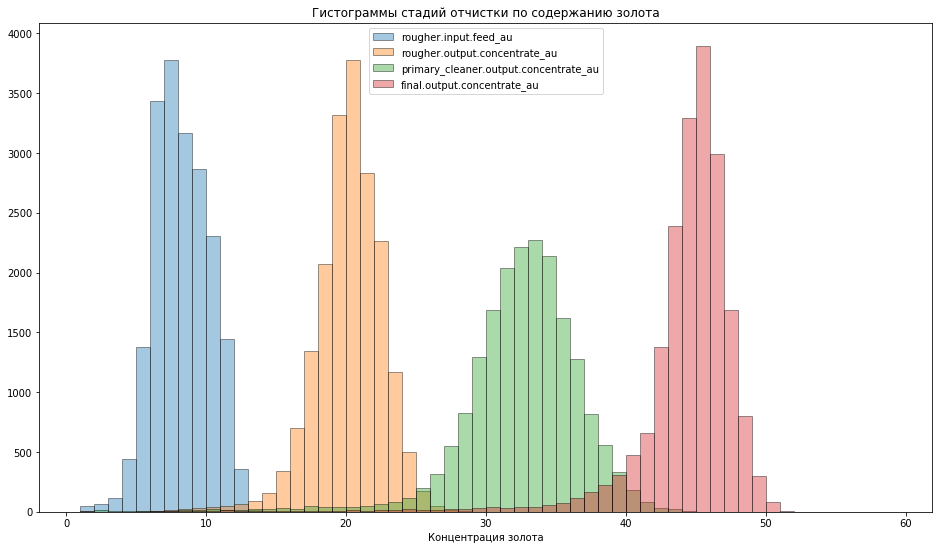

In [8]:
plt.figure(figsize=(16, 9))
for col in concentrate_au.columns:
    sns.distplot(concentrate_au[col], label=col,
                 bins=range(1, 60, 1),
                 kde=False, hist_kws=dict(edgecolor='black'))
plt.title('Гистограммы стадий отчистки по содержанию золота')
plt.xlabel('Концентрация золота')
plt.legend()
plt.show()

По данным гистограммам для золота видно, как возрастает его концентрация с течением каждого этапа. Мы видим  самую малую концентрацию на сырьевом образце и самую высокую концентрацию на финальном продукте.

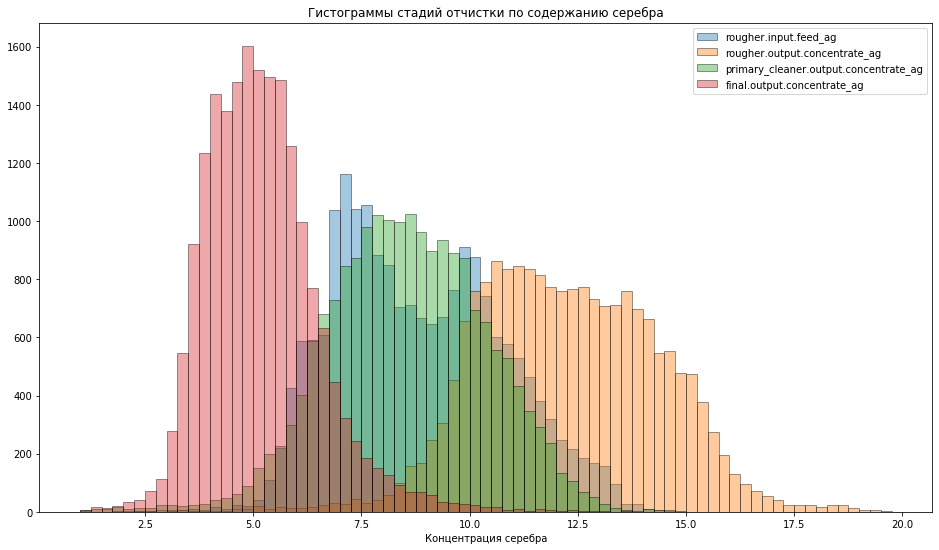

In [9]:
plt.figure(figsize=(16, 9))
for col in concentrate_ag.columns:
    sns.distplot(concentrate_ag[col], label=col,
                 bins=np.arange(1, 20, 0.25),
                 kde=False, hist_kws=dict(edgecolor='black'))
plt.title('Гистограммы стадий отчистки по содержанию серебра')
plt.xlabel('Концентрация серебра')
plt.legend()
plt.show()

С серебром ситуция другая, по мере отчистки его концентрация снижается. Видно, что самую высокую концентрация серебро имеет после этапа флотации, но к концу всех процедур, в большинстве своем его концентрация не превышает 10.

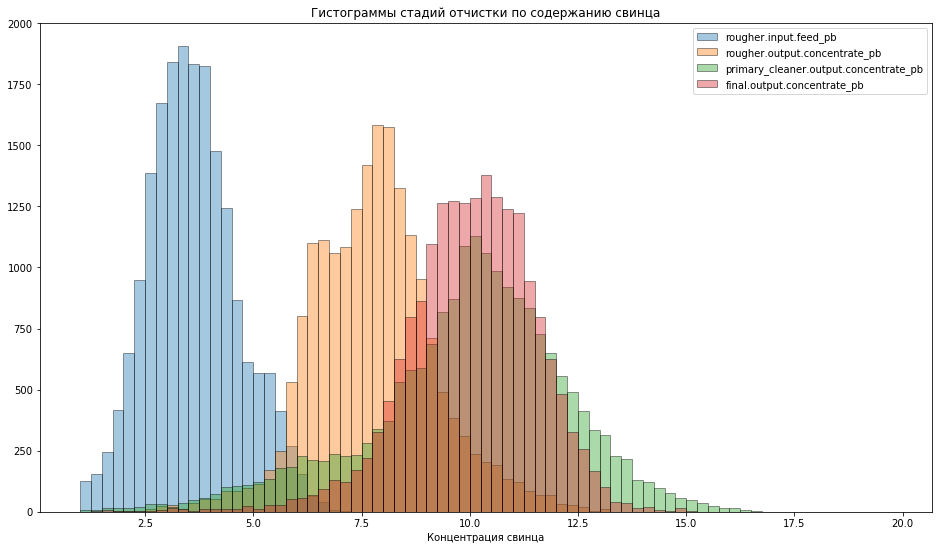

In [10]:
plt.figure(figsize=(16, 9))
for col in concentrate_pb.columns:
    sns.distplot(concentrate_pb[col], label=col,
                 bins=np.arange(1, 20, 0.25),
                 kde=False, hist_kws=dict(edgecolor='black'))
plt.title('Гистограммы стадий отчистки по содержанию свинца')
plt.xlabel('Концентрация свинца')
plt.legend()
plt.show()

Свинец ведет себя отлично как от золота, так и от серебра. По мере этапов, его концентрация увеличивается, но не так стремительно как в случае золота. Плюс, с точки зрения очистки, больших отличий в концентрации после первого этапа и в финальном продукте не видно.

Кроме этого, мы можем заметить количественные характеристики концентраций и сказать, что процесс отчистки золота идет верно, так как его содержание в финальном продукте сравнимо выше содержания свинца и серебра. 

## Изучение распределения размеров гранул сырья на обучающей и тестовой выборках

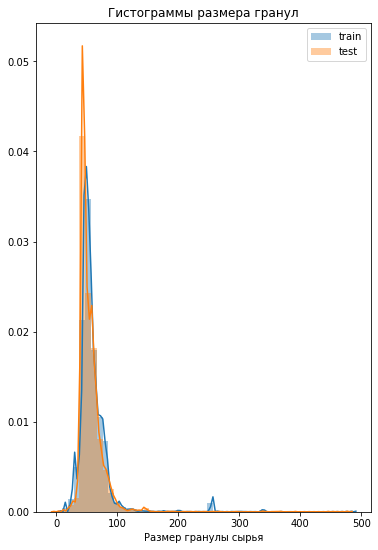

In [11]:
feed_size_train = gold_recovery_train['rougher.input.feed_size']
feed_size_test = gold_recovery_test['rougher.input.feed_size']

plt.figure(figsize=(6, 9))
ax = sns.distplot(feed_size_train, hist = True)
sns.distplot(feed_size_test, ax = ax, axlabel ='Размер гранулы сырья')
plt.title('Гистограммы размера гранул')
plt.legend(labels = ['train', 'test'])
plt.show()

Из распределений размера гранул в тестовой и тренировочной выборках, можем сказать что они схожи. Следовательно, нет причин переживать по поводу того, что в последующих этапах проекта оценка модели будет неправильной.

## Изучение суммарной концентрации всех веществ на разных стадиях

In [12]:
gold_recovery_full['rougher_input_feed_sum'] = gold_recovery_full['rougher.input.feed_ag'] + \
    gold_recovery_full['rougher.input.feed_pb'] + gold_recovery_full['rougher.input.feed_sol'] +  \
    gold_recovery_full['rougher.input.feed_au']
    
gold_recovery_full['rougher_output_concentrate_sum'] = gold_recovery_full['rougher.output.concentrate_au'] + \
    gold_recovery_full['rougher.output.concentrate_ag'] + gold_recovery_full['rougher.output.concentrate_pb'] +  \
    gold_recovery_full['rougher.output.concentrate_sol']

gold_recovery_full['primary_cleaner_output_concentrate_sum'] = gold_recovery_full['primary_cleaner.output.concentrate_au'] + \
    gold_recovery_full['primary_cleaner.output.concentrate_pb'] + gold_recovery_full['primary_cleaner.output.concentrate_sol'] + \
    gold_recovery_full['primary_cleaner.output.concentrate_ag']

gold_recovery_full['final_output_concentrate_sum'] = gold_recovery_full['final.output.concentrate_au'] + \
    gold_recovery_full['final.output.concentrate_pb'] + gold_recovery_full['final.output.concentrate_sol'] +  \
    gold_recovery_full['final.output.concentrate_ag']

gold_recovery_full_sums = gold_recovery_full[['rougher_input_feed_sum', 'rougher_output_concentrate_sum', 
                                        'primary_cleaner_output_concentrate_sum',  'final_output_concentrate_sum']]
display(gold_recovery_full_sums.head())

,rougher_input_feed_sum,rougher_output_concentrate_sum,primary_cleaner_output_concentrate_sum,final_output_concentrate_sum
0,51.680034,66.424950,72.640924,63.644396
1,50.659114,67.012710,72.543485,63.957723
2,50.609929,66.103793,72.095042,64.311180
3,51.061546,65.752751,59.957723,63.573449
4,47.859163,65.908382,71.321010,64.004667


На основе всех данных была посчитана суммарная концентрация всех металлов на каждом этапе. Таблица - gold_recovery_full_sums.

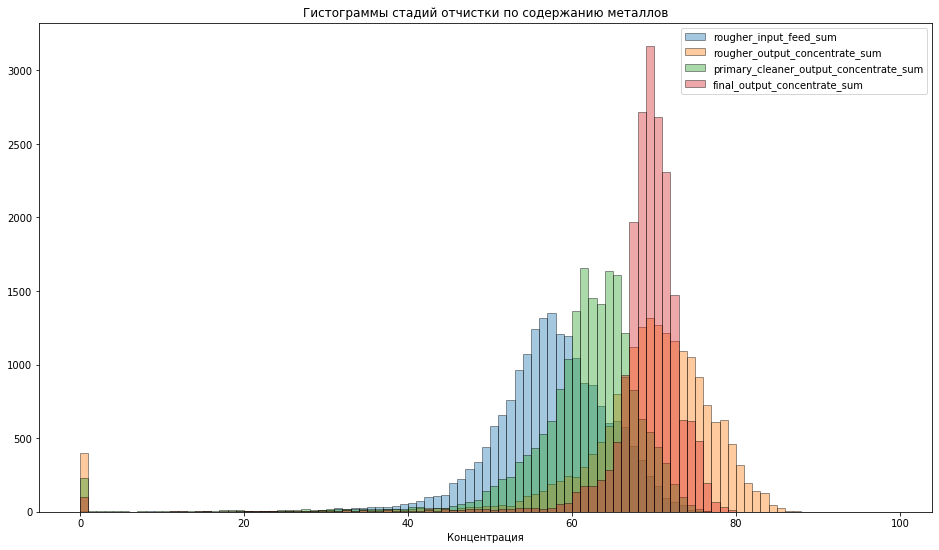

In [13]:
plt.figure(figsize=(16, 9))
for col in gold_recovery_full_sums.columns:
    sns.distplot(gold_recovery_full[col], label=col,
                 bins=range(0, 100, 1),
                 kde=False, hist_kws=dict(edgecolor='black'))
plt.title('Гистограммы стадий отчистки по содержанию металлов')
plt.xlabel('Концентрация')
plt.legend()
plt.show()

Из полученных распределений видно, что все аномальные значения находяться в левой части гистограмм. Было принято решение убрать со всех выборок объекты, у которых суммарное содержание металлов по стадиям не превыщает 10.

In [14]:
gold_recovery_full=gold_recovery_full.query('rougher_input_feed_sum > 10 and rougher_output_concentrate_sum > 10')
gold_recovery_full=gold_recovery_full.query('primary_cleaner_output_concentrate_sum > 10 and final_output_concentrate_sum >10')


gold_recovery_train = gold_recovery_train.merge(gold_recovery_full['date'], on = 'date')

После избавления от аномальных значений количество объектов в тренировочной выборке сократилось.

# 3. Модель

### sMAPE, выбор подходящей модели

In [15]:
def smape_fun(target, prediction):
    sMAPE = (abs(target - prediction) / ((abs(target) + abs(prediction)) / 2)  * 100).mean()
    return sMAPE

smape_score = make_scorer(smape_fun, greater_is_better = True)

In [16]:
features_train = gold_recovery_train[gold_recovery_test.columns].drop('date', axis = 1)
target_rougher_train = gold_recovery_train['rougher.output.recovery']
target_final_train = gold_recovery_train['final.output.recovery']

In [17]:
#scaler = StandardScaler()
#scaler.fit(features_train)
#features_train = pd.DataFrame(scaler.transform(features_train), columns = features_train.columns)
#display(features_train.head())

Перед поиском наилучшей модели была написана фунцкия для расчета sMAPE. После данные были поделены на признаки и целевые признаки.

In [18]:
best_val_score_final = 100
best_depth_rougher = 1
best_depth_final = 1
for depth in range(1, 7, 1):
    model = DecisionTreeRegressor(max_depth = depth, random_state = 12345)
    #score_rougher = cross_val_score(model, features_train, target_rougher_train, cv = 5, scoring = 'neg_mean_absolute_error').mean() * (-1)
    score_final = cross_val_score(model, features_train, target_final_train, cv = 3, scoring = smape_score).mean()
    if score_final < best_val_score_final:
        best_val_score_final = score_final
        best_depth_final = depth
print(best_val_score_final, best_depth_final)

10.15223869534113 1


In [19]:
best_val_score_final = 100
best_depth_final = 1
best_est_final = 1
for est in range(1, 7, 1):
    for depth in range(1, 7):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        #score_rougher = cross_val_score(model, features_train, target_rougher_train, cv = 5, scoring = 'neg_mean_absolute_error').mean() * (-1)
        score_final = cross_val_score(model, features_train, target_final_train, cv = 3, scoring = smape_score).mean()
        if score_final < best_val_score_final:
            best_val_score_final = score_final
            best_depth_final = depth
            best_est_final = est
print(best_val_score_final, best_depth_final, best_est_final)

9.780605085234553 2 5


In [20]:
model = LinearRegression()
#score_rougher = \ 
#    cross_val_score(model1, features_train, target_rougher_train, cv = 5, scoring = 'neg_mean_absolute_error').mean() * (-1)
score_final = \
    cross_val_score(model, features_train, target_final_train, cv = 5, scoring = smape_score).mean()
    
print(score_final)

11.072508238886734


Обучив модели случайного леса, дерева решений, линейно регрессии я выбрал модель случайного леса с глубиной 2 и количеством деревьев 5, так как она показала наилучшие результаты на кросвалидации с метрикой neg_mean_absolute_error.

### Получение ключевых метрик для финальной модели

In [21]:
gold_recovery_test = \
    gold_recovery_test.merge(gold_recovery_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on = 'date')

Были добавлены  при помощи inner join в тестовую выборку целевые признаки для проверки качества модели.

In [22]:
gold_recovery_test_features = gold_recovery_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)

Создание выборки с признаками для теста.

In [24]:
model_1 = RandomForestRegressor(random_state=12345, n_estimators=5, max_depth=2)
model_1.fit(features_train, target_rougher_train)
prediction_rougher = model_1.predict(gold_recovery_test_features)

model_2 = RandomForestRegressor(random_state=12345, n_estimators=5, max_depth=2)
model_2.fit(features_train, target_final_train)
prediction_final = model_2.predict(gold_recovery_test_features)

print('sMAPE для флотации - ',smape_fun(gold_recovery_test['rougher.output.recovery'], prediction_rougher))
print('sMAPE для финального продукта - ',smape_fun(gold_recovery_test['final.output.recovery'], prediction_final))
print('Итоговый sMAPE - ', 0.25 * smape_fun(gold_recovery_test['rougher.output.recovery'], prediction_rougher) + 
             0.75 * smape_fun(gold_recovery_test['final.output.recovery'], prediction_final))

sMAPE для флотации -  4.667304320868331
sMAPE для финального продукта -  7.636971122526665
Итоговый sMAPE -  6.894554422112082


# Вывод

В ходе данного проекта были проведены исследования процесса добычи руды. Были проверены качество подготовки данных и сами данные. По итогам можно сказать следующее:
1. По результатам расчета метрики MAE можно сделать вывод, что rougher.output.recovery посчитано верно.
2. Проанализировав поля отсутствующие в тестовой выборке можно сделать вывод, что из неё были удалены поля содержащие параметры финально продукта, целевые признаки, поля с типом output(параметры продукта) и расчетные характеристики(calculation). То есть по тестовой выбоке мы можем сказать что приходит(input) на определенный этап(флотация отчистка), что на нем происходит(state).
3. В ходе этапа подготовки данных были изучены все предоставленные выборки, были изучены все признаки и этапы добычи и обработки руды. Была осуществлена проверка расчетов некоторых признаков. Кроме этого пропуски в полях заменили на подходящие значения методом ffill().
4. По данным гистограммам для золота видно, как возрастает его концентрация с течением каждого этапа. Мы видим самую малую концентрацию на сырьевом образце и самую высокую концентрацию на финальном продукте.
5. С серебром ситуция другая, по мере отчистки его концентрация снижается. Видно, что самую высокую концентрация серебро имеет после этапа флотации, но к концу всех процедур, в большинстве своем его концентрация не превышает 10.
6. Свинец ведет себя отлично как от золота, так и от серебра. По мере этапов, его концентрация увеличивается, но не так стремительно как в случае золота. Плюс, с точки зрения очистки, больших отличий в концентрации после первого этапа и в финальном продукте не видно.
7. Кроме этого, мы можем заметить количественные характеристики концентраций и сказать, что процесс отчистки золота идет верно, так как его содержание в финальном продукте сравнимо выше содержания свинца и серебра.
8. Из распределений размера гранул в тестовой и тренировочной выборках, можем сказать что они схожи. Следовательно, нет причин переживать по поводу того, что в последующих этапах проекта оценка модели будет неправильной.
9. Перед поиском наилучшей модели была написана фунцкия для расчета sMAPE. После данные были поделены на признаки и целевые признаки.
10. Обучив модели случайного леса, дерева решений, линейно регрессии я выбрал модель случайного леса с глубиной 2 и количеством деревьев 4, так как она показала наилучшие результаты на кросвалидации с метрикой neg_mean_absolute_error.
11. Ключевая метрика обучения модели sMAPE для флотации -  4.667304320868331
12. Ключевая метрика обучения модели sMAPE для финального продукта -  7.636971122526665
13. Ключевая метрика обучения модели - Итоговый sMAPE -  6.894554422112082

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке